# 1. 讀取檔案

In [467]:
pip install scikit-learn xgboost


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [468]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from scipy.stats import kurtosis
import matplotlib.pyplot as plt
from scipy.stats import skew
import numpy as np

# 讚嘆 GPT(雖然是 Gemini)
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# 使用 pandas 的 read_csv 函式讀取訓練資料
df = pd.read_csv("data/train.csv")
median_imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()

In [469]:
def preprocess(df : pd.DataFrame, test=False) -> tuple[pd.DataFrame, pd.DataFrame]:
    filled_features = df.select_dtypes('number').columns.drop(['mpg', 'id'], errors='ignore')
    df_clean = df.copy()

    if not test: df_clean[filled_features] = median_imputer.fit_transform(df_clean[filled_features])
    else: df_clean[filled_features] = median_imputer.transform(df_clean[filled_features])

    df_final = pd.get_dummies(df_clean, columns=['origin'], prefix='origin', dtype=int)

    for col in filled_features:
        df_final[col + '_sq'] = df_final[col] ** 2

    log_cols = ['weight', 'displacement', 'horsepower']
    for col in log_cols:
        df_final[col + '_log'] = np.log(df_final[col] + 1)
    
    df_final['hp_weight'] = df_final['horsepower'] * df_final['weight']
    df_final['displacement_cylinders'] = df_final['displacement'] * df_final['cylinders']
    df_final['hp_displacement'] = df_final['horsepower'] * df_final['displacement']
    df_final['weight_acceleration'] = df_final['weight'] * df_final['acceleration']

    df_final['weight_displacement_ratio'] = df_final['weight'] / (df_final['displacement'] + 1)
    df_final['horsepower_cylinders_ratio'] = df_final['horsepower'] / (df_final['cylinders'] + 1)
    df_final['hp_weight_ratio'] = df_final['horsepower'] / (df_final['weight'] + 1)
    df_final['displacement_cylinders_ratio'] = df_final['displacement'] / (df_final['cylinders'] + 1)

    X = df_final.drop(columns=['mpg', 'name', 'id'], errors='ignore')
    
    if not test: X[filled_features] = scaler.fit_transform(X[filled_features])
    else: X[filled_features] = scaler.transform(X[filled_features])

    if test: return X, None

    target = 'mpg'
    Y = df_final[target]

    return X, Y


# 2.資料預處理

In [470]:
# 直接刪除任何含有缺失值的整行資料
# HINT：有更好的預處理填補方式嗎？
df_clean = df.dropna()

# 3.特徵工程

In [471]:
# # HINT：這串列遺漏了部分特徵，另外，有方法額外加上新的特徵嗎？
# df_final = pd.get_dummies(
#     df_clean, 
#     columns=['origin'], 
#     prefix='origin', 
#     drop_first=True,
#     dtype=int
# )

# # print(df_final.head(5))

# # 定義要用來預測的特徵欄位
# features = [
#     'weight', 'acceleration', 'model_year', 
#     'cylinders', 'displacement', 'horsepower', 
#     'origin_japan', 'origin_usa'
# ]

# # 定義我們要預測的目標欄位
# target = 'mpg'

# 從乾淨的資料中選取 X 和 y
X, Y = preprocess(df)

# 4. 訓練模型

模型已訓練完成！
訓練誤差 (Train RMSE): 1.3420 MPG
測試誤差 (Test RMSE):  1.8698 MPG
cylinders: 0.0012
displacement: 0.0514
horsepower: 0.0142
weight: 0.0497
acceleration: 0.0059
model_year: 0.0598
origin_europe: 0.0018
origin_japan: 0.0012
origin_usa: 0.0009
cylinders_sq: 0.0005
displacement_sq: 0.0524
horsepower_sq: 0.0160
weight_sq: 0.0601
acceleration_sq: 0.0054
model_year_sq: 0.0563
weight_log: 0.0609
displacement_log: 0.0550
horsepower_log: 0.0154
hp_weight: 0.2559
displacement_cylinders: 0.0838
hp_displacement: 0.0484
weight_acceleration: 0.0150
weight_displacement_ratio: 0.0534
horsepower_cylinders_ratio: 0.0089
hp_weight_ratio: 0.0100
displacement_cylinders_ratio: 0.0166


/Users/corn/.pyenv/versions/3.13.3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 27544 (\N{CJK UNIFIED IDEOGRAPH-6B98}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/corn/.pyenv/versions/3.13.3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24046 (\N{CJK UNIFIED IDEOGRAPH-5DEE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/corn/.pyenv/versions/3.13.3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/corn/.pyenv/versions/3.13.3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


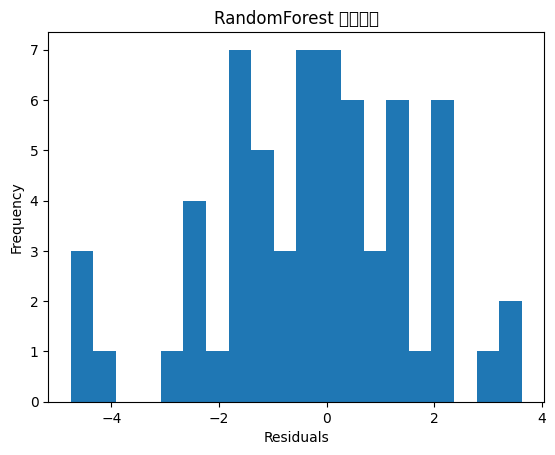

Residual skewness: -0.3397
Residual kurtosis: 0.0516
Mean residual: -0.25534806462273996


In [472]:
# 分割訓練集與測試集 (用於本地評估模型好壞)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=7)

# 建立並訓練模型
model = RandomForestRegressor(
    n_estimators=777, 
    max_depth=7, 
    min_samples_leaf=1,
    random_state=77
)
model.fit(X_train, y_train)

# 進行預測與評估
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

print("模型已訓練完成！")
print(f"訓練誤差 (Train RMSE): {train_rmse:.4f} MPG")
print(f"測試誤差 (Test RMSE):  {test_rmse:.4f} MPG")

importances = model.feature_importances_
sorted_idx = np.argsort(importances)[::-1]
for idx, col in enumerate(X.columns):
    print(f"{col}: {importances[idx]:.4f}")

residuals = y_test - test_predictions
plt.hist(residuals, bins=20)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("RandomForest 殘差分布")
plt.show()

res_skew = skew(residuals)
print(f"Residual skewness: {res_skew:.4f}")

res_kurt = kurtosis(residuals)
print(f"Residual kurtosis: {res_kurt:.4f}")

# 平均殘差
print("Mean residual:", residuals.mean())
# print("\n--- 模型學到的關係 ---")

# # 各個特徵的權重
# all_numeric = X_train.select_dtypes('number').columns.drop('mpg', errors='ignore')

# # 最終特徵
# features = list(all_numeric)
# for feature, coef in zip(features, model.coef_):
#     print(f"特徵 '{feature}' 的權重: {coef:.4f}")

# print("\n--- 每個特徵的單變量 R²（單獨與 mpg 線性相關程度） ---")

# for feature in features:
#     # 單特徵做線性模型
#     single_model = LinearRegression()
#     single_model.fit(X_train[[feature]], y_train)

#     # 計算 R²
#     r2 = single_model.score(X_test[[feature]], y_test)
#     print(f"特徵 '{feature}' 的單變量 R²: {r2:.4f}")

In [473]:
def analyze_large_residuals(X_test, y_test, test_predictions, threshold=2):
    """
    分析殘差大於 threshold 的樣本
    
    X_test : pd.DataFrame       # 測試集特徵
    y_test : pd.Series          # 測試集真實值
    test_predictions : np.array # 模型預測值
    threshold : float           # 殘差判定閾值
    """
    # 殘差
    residuals = y_test - test_predictions
    
    # 選出高殘差樣本
    large_residuals = residuals[residuals > threshold]
    print(f"殘差大於 {threshold} 的樣本數量: {len(large_residuals)}\n")
    
    # 對應特徵
    problematic_samples = X_test.loc[large_residuals.index].copy()
    
    # 將預測值轉成 Series 對齊 index
    test_pred_series = pd.Series(test_predictions, index=y_test.index)
    
    problematic_samples['actual_mpg'] = y_test.loc[large_residuals.index]
    problematic_samples['predicted_mpg'] = test_pred_series.loc[large_residuals.index]
    problematic_samples['residual'] = residuals[large_residuals.index]
    
    # 排序
    problematic_samples = problematic_samples.sort_values(by='residual', ascending=False)
    
    # 計算高殘差樣本特徵平均值，方便找共同特徵
    feature_means = problematic_samples.drop(columns=['actual_mpg', 'predicted_mpg', 'residual']).mean()
    
    print("高殘差樣本特徵平均值（可看哪些特徵偏大/偏小）：\n")
    print(feature_means.sort_values(ascending=False))
    
    return problematic_samples

# 使用範例
large_res_samples = analyze_large_residuals(X_test, y_test, test_predictions, threshold=2)

殘差大於 2 的樣本數量: 8

高殘差樣本特徵平均值（可看哪些特徵偏大/偏小）：

weight_sq                       7.987923e+06
hp_weight                       2.789222e+05
weight_acceleration             4.326200e+04
displacement_sq                 2.767488e+04
hp_displacement                 1.635062e+04
horsepower_sq                   1.003175e+04
model_year_sq                   6.218750e+03
displacement_cylinders          7.967500e+02
acceleration_sq                 2.613413e+02
cylinders_sq                    2.450000e+01
displacement_cylinders_ratio    2.435040e+01
weight_displacement_ratio       2.019354e+01
horsepower_cylinders_ratio      1.630714e+01
weight_log                      7.887197e+00
displacement_log                4.897429e+00
horsepower_log                  4.508809e+00
model_year                      7.355721e-01
origin_usa                      5.000000e-01
origin_japan                    2.500000e-01
origin_europe                   2.500000e-01
acceleration                    1.169163e-01
hp_weight_ra

In [474]:
# 殘差
residuals = y_test - test_predictions

# 殘差 > 2 的樣本
large_residuals = residuals[residuals > 2]
print(f"殘差大於 2 的樣本數量: {len(large_residuals)}\n")

# 對應特徵
problematic_samples = X_test.loc[large_residuals.index].copy()

# 把 test_predictions 轉成 Series 對齊 index
test_pred_series = pd.Series(test_predictions, index=y_test.index)

problematic_samples['actual_mpg'] = y_test.loc[large_residuals.index]
problematic_samples['predicted_mpg'] = test_pred_series.loc[large_residuals.index]
problematic_samples['residual'] = residuals[large_residuals.index]

# 排序
problematic_samples = problematic_samples.sort_values(by='residual', ascending=False)

problematic_samples

殘差大於 2 的樣本數量: 8



,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa,cylinders_sq,...,displacement_cylinders,hp_displacement,weight_acceleration,weight_displacement_ratio,horsepower_cylinders_ratio,hp_weight_ratio,displacement_cylinders_ratio,actual_mpg,predicted_mpg,residual
145,-0.850515,-0.465895,-0.196837,-0.362228,-0.630659,1.638975,0,1,0,16.0,...,576.0,13824.0,37043.5,18.379310,19.200000,0.036009,28.800000,32.0,28.371079,3.628921
15,-0.850515,-0.845192,-1.088561,-1.005625,-0.340690,1.638975,0,0,1,16.0,...,420.0,6615.0,31237.5,20.047170,12.600000,0.029633,21.000000,38.0,34.715286,3.284714
264,-0.850515,-1.010526,-0.737276,-1.077113,-0.413182,-1.418697,1,0,0,16.0,...,352.0,6688.0,29942.5,23.202247,15.200000,0.036786,17.600000,30.0,27.153813,2.846187
310,-0.850515,-0.709034,-0.575144,-0.296696,1.362875,1.638975,0,0,1,16.0,...,476.0,9758.0,52768.0,22.666667,16.400000,0.030136,23.800000,31.0,28.641107,2.358893
150,-0.850515,-0.777113,-0.413013,-0.683926,0.855430,1.638975,0,0,1,16.0,...,448.0,9856.0,43110.0,21.194690,17.600000,0.036728,22.400000,34.0,31.666393,2.333607
138,0.338337,-0.456169,-0.737276,0.227553,1.435367,1.361005,1,0,0,36.0,...,870.0,11020.0,61936.0,21.643836,10.857143,0.024043,20.714286,30.7,28.396785,2.303215
239,1.527188,1.537573,2.073006,1.681154,-1.283088,-0.028846,0,0,1,64.0,...,2800.0,63000.0,52998.0,12.478632,20.000000,0.041087,38.888889,16.5,14.201653,2.298347
73,-0.850515,-0.816015,-0.277903,-0.688692,-0.050722,-0.584786,0,1,0,16.0,...,432.0,10044.0,37060.5,21.935780,18.600000,0.038880,21.600000,26.0,23.986411,2.013589


In [475]:
# param_grid = {
#     'n_estimators': [500, 800, 1000],
#     'max_depth': [4, 6, 8],
#     'min_samples_leaf': [1, 2, 4]
# }

# rf = RandomForestRegressor(random_state=42)
# grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_root_mean_squared_error')
# grid_search.fit(X_train, y_train)

# print("Best params:", grid_search.best_params_)
# print("Best CV RMSE:", -grid_search.best_score_)

### 初始版

訓練誤差 (Train RMSE): 3.3241 MPG

測試誤差 (Test RMSE):  3.6002 MPG

*這裡中位數設定有錯，會看到測試集

### GPT 通靈一波

訓練誤差 (Train RMSE): 3.2922 MPG

測試誤差 (Test RMSE):  3.6340 MPG

### 刪掉通靈的部分(留下標準化)

訓練誤差 (Train RMSE): 3.2922 MPG

測試誤差 (Test RMSE):  3.6340 MPG

\*不知為啥沒變

### 換成填眾數

訓練誤差 (Train RMSE): 3.2919 MPG

測試誤差 (Test RMSE):  3.6353 MPG

### 換成平均

訓練誤差 (Train RMSE): 3.2941 MPG

測試誤差 (Test RMSE):  3.6265 MPG

*神奇，Over fit?

# 5.輸出提交檔案

In [476]:
# 讀取需要進行預測的測試檔案 test.csv
df_test = pd.read_csv("data/test.csv")

# 對測試資料進行預處理
# HINT：如果前面使用了其他的預處理方式，這邊要如何修改？
X, Y = preprocess(df_test, True)

# 使用訓練好的模型，對測試資料進行預測
predictions = model.predict(X)

# 建立一個新的 DataFrame
submission_df = pd.DataFrame({'Id':df_test['id'], 'mpg': predictions})

# 保存為 submission.csv
submission_df.to_csv('submission.csv', index=False)
print("提交文件 'submission.csv' 已成功生成！")

提交文件 'submission.csv' 已成功生成！


# 6. 報告

姓名：__許博智__ 學號：__114403549__

__我的帳號名稱是 Corn，我有試著修改暱稱，但他怪怪的，不知道有沒有改到，如果沒有的話抱歉造成困擾了__

第一部分：準確度分數 (Accuracy Scores) (1分)  
我的準確度分數：__2.69183（寫完心得後又戳到了 2.18816）__  

第二部分：我的實驗記錄 (My Experiment Log) (3分)  
請記錄你做了哪些嘗試來提升分數，至少記錄兩次不同的嘗試。  
【實驗 1】  
    我做的修改：__填上中位數、做 one hot__  
    結果與觀察 (分數變化、心得等)：__之前學得都忘光了 :D__  
    該次實驗分數： __3.6002__  
【實驗 2】  
    我做的修改：__(去找了 GPT)發現之前寫的中位數會吃到測試集的資料，好像不太好，調了回來。然後把資料標準化__  
    結果與觀察 (分數變化、心得等)：__GPT 真厲害 :D，分數下降了，但應該是因為之前會看到測試集的原因？__  
    該次實驗分數： __3.6340__  
【實驗 3】  
    我做的修改：__把填數值的方式改成平均和眾數試試看__  
    結果與觀察 (分數變化、心得等)：__平均不知道為甚麼比較低？怪怪的，但總之他分數最好看__  
    該次實驗分數： __3.6265__  
【實驗 4】  
    我做的修改：__發現之前的修改都沒有改到 X 裡面，修正了錯誤__  
    結果與觀察 (分數變化、心得等)：__就覺得，「白痴喔，搞了那麼久」，總之，分數降到 2 開頭了__  
    該次實驗分數： __2.82694__  
【實驗 5】  
    我做的修改：__嘗試性地不使用線性模型__  
    結果與觀察 (分數變化、心得等)：__那別人都做了別的模型了，不用也說不過去對不對 :D，使用的是 Ridge，總之，過了__  
    該次實驗分數： __2.69183__  

第三部分：總結與心得 (Conclusion & Reflection) (2分)  
請撰寫一段約 50-100 字的心得總結。內容需包含：  
(1) 你認為本次實驗中，提升準確率最有效的修改是什麼。  
(2) 這次不斷嘗試與修正的過程，帶給你最大的學習與啟發。  
內容：

~~AI 真的是在通靈~~，還是有很多步驟容易忘記和做錯，還需要多多練習。把中位數調回來後有點糾結到底有沒有錯，也不太確定，畢竟上課教的方法也和這個不太一樣。但總之弄出來了，還算能用？不太確定到底要調到多少才算好，所以就先這樣吧，之後的優化要花一點時間和腦子了，還不一定有用 .w.。還是多燒香說不定比較有救，好玩，有空再回來玩，要去讀微積分了 :P。

更新：

讀完考試後回來發現有一大堆錯誤，新增的特徵根本沒有被吃到，難怪怎麼調都沒用。把程式修好後數值就降到 2 開頭了，開心。主要是把特徵新增了幾個關於 log 或 square 的特徵，然後把模型換過來。真的是突然就過了，我也不知道到底怎麼辦到的，這應該就是玩 AI 的樂趣吧 :D。

再更新：

過了之後想說把各種模型都戳一遍，然後就試試看了隨機森林，然後就第一名ㄌ，GPT 超猛。接著對參數進行了一點微調，把數字調上去後就成功壓到 2.26 了，AI 真的很神奇。

再再更新：

發現今天 7 是我的幸運數子，所以把 random state 都改成 7 或 77，然後就變 2.18 了。我現在只想問：How?...How?